<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.660517,95.803559,84.186199,-21.434141,216.216134,234.479966,-18.263832
1,0.0,1.0,46.927130,22.636765,45.545954,-4.466783,120.643068,124.038302,-3.395234
2,0.0,2.0,25.523530,43.119024,74.843289,-18.463047,135.022797,151.885933,-16.863137
3,0.0,3.0,75.686024,72.062532,59.698773,2.180843,219.628172,216.320814,3.307358
4,0.0,4.0,26.478905,99.764033,90.171921,-6.644467,219.770391,221.509344,-1.738953
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.740999,26.515966,49.243427,0.943757,178.444149,182.777020,-4.332871
59996,999.0,56.0,61.419512,41.071169,73.984352,8.726493,195.201526,186.828344,8.373182
59997,999.0,57.0,59.137948,44.617236,49.416934,-0.492818,162.679300,164.836464,-2.157164
59998,999.0,58.0,95.563692,49.686049,29.944740,-2.536156,182.658325,190.621644,-7.963319


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.660517,95.803559,84.186199,-21.434141,216.216134,234.479966,-18.263832
1,0.0,1.0,46.927130,22.636765,45.545954,-4.466783,120.643068,124.038302,-3.395234
2,0.0,2.0,25.523530,43.119024,74.843289,-18.463047,135.022797,151.885933,-16.863137
3,0.0,3.0,75.686024,72.062532,59.698773,2.180843,219.628172,216.320814,3.307358
4,0.0,4.0,26.478905,99.764033,90.171921,-6.644467,219.770391,221.509344,-1.738953
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.740999,26.515966,49.243427,0.943757,178.444149,182.777020,-4.332871
59996,999.0,56.0,61.419512,41.071169,73.984352,8.726493,195.201526,186.828344,8.373182
59997,999.0,57.0,59.137948,44.617236,49.416934,-0.492818,162.679300,164.836464,-2.157164
59998,999.0,58.0,95.563692,49.686049,29.944740,-2.536156,182.658325,190.621644,-7.963319


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    47.660517  95.803559  84.186199  ...  216.216134  234.479966 -18.263832
      1.0    46.927130  22.636765  45.545954  ...  120.643068  124.038302  -3.395234
      2.0    25.523530  43.119024  74.843289  ...  135.022797  151.885933 -16.863137
      3.0    75.686024  72.062532  59.698773  ...  219.628172  216.320814   3.307358
      4.0    26.478905  99.764033  90.171921  ...  219.770391  221.509344  -1.738953
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   91.740999  26.515966  49.243427  ...  178.444149  182.777020  -4.332871
      56.0   61.419512  41.071169  73.984352  ...  195.201526  186.828344   8.373182
      57.0   59.137948  44.617236  49.416934  ...  162.679300  164.836464  -2.157164
      58.0   95.563692  49.686049  29.944740  ...  182.658325  190.621644  -7.963319
      59.0   91.848900  60.296155  82.662727  ...  246.960062  245.613456   1.346606

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    47.660517  95.803559  84.186199  ...  216.216134  234.479966 -18.263832
      1.0    46.927130  22.636765  45.545954  ...  120.643068  124.038302  -3.395234
      2.0    25.523530  43.119024  74.843289  ...  135.022797  151.885933 -16.863137
      3.0    75.686024  72.062532  59.698773  ...  219.628172  216.320814   3.307358
      4.0    26.478905  99.764033  90.171921  ...  219.770391  221.509344  -1.738953
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   91.740999  26.515966  49.243427  ...  178.444149  182.777020  -4.332871
      56.0   61.419512  41.071169  73.984352  ...  195.201526  186.828344   8.373182
      57.0   59.137948  44.617236  49.416934  ...  162.679300  164.836464  -2.157164
      58.0   95.563692  49.686049  29.944740  ...  182.658325  190.621644  -7.963319
      59.0   91.848900  60.296155  82.662727  ...  246.960062  245.613456   1.346606

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.660517,95.803559,84.186199,-21.434141,216.216134,234.479966,-18.263832
1,0.0,1.0,46.927130,22.636765,45.545954,-4.466783,120.643068,124.038302,-3.395234
2,0.0,2.0,25.523530,43.119024,74.843289,-18.463047,135.022797,151.885933,-16.863137
3,0.0,3.0,75.686024,72.062532,59.698773,2.180843,219.628172,216.320814,3.307358
4,0.0,4.0,26.478905,99.764033,90.171921,-6.644467,219.770391,221.509344,-1.738953
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.740999,26.515966,49.243427,0.943757,178.444149,182.777020,-4.332871
59996,999.0,56.0,61.419512,41.071169,73.984352,8.726493,195.201526,186.828344,8.373182
59997,999.0,57.0,59.137948,44.617236,49.416934,-0.492818,162.679300,164.836464,-2.157164
59998,999.0,58.0,95.563692,49.686049,29.944740,-2.536156,182.658325,190.621644,-7.963319


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    47.660517  95.803559  84.186199  ...  216.216134  234.479966 -18.263832
      1.0    46.927130  22.636765  45.545954  ...  120.643068  124.038302  -3.395234
      2.0    25.523530  43.119024  74.843289  ...  135.022797  151.885933 -16.863137
      3.0    75.686024  72.062532  59.698773  ...  219.628172  216.320814   3.307358
      4.0    26.478905  99.764033  90.171921  ...  219.770391  221.509344  -1.738953
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   91.740999  26.515966  49.243427  ...  178.444149  182.777020  -4.332871
      56.0   61.419512  41.071169  73.984352  ...  195.201526  186.828344   8.373182
      57.0   59.137948  44.617236  49.416934  ...  162.679300  164.836464  -2.157164
      58.0   95.563692  49.686049  29.944740  ...  182.658325  190.621644  -7.963319
      59.0   91.848900  60.296155  82.662727  ...  246.960062  245.613456   1.346606

[60000 rows x 7 columns]

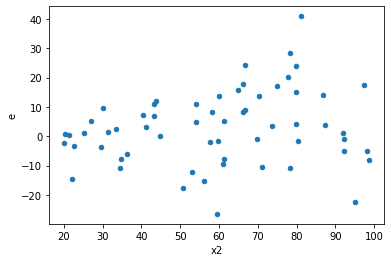

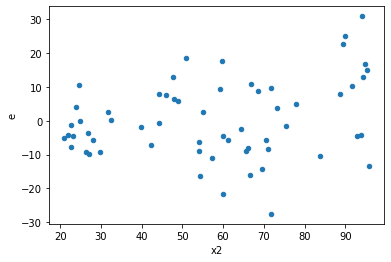

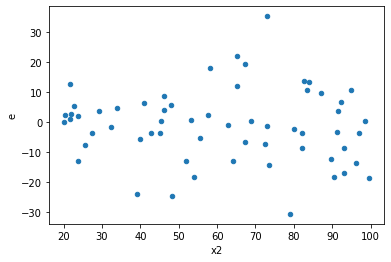

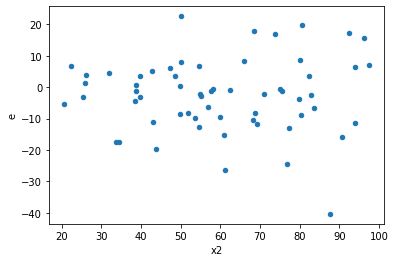

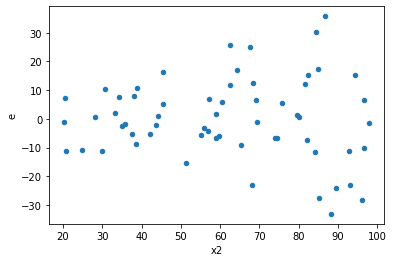

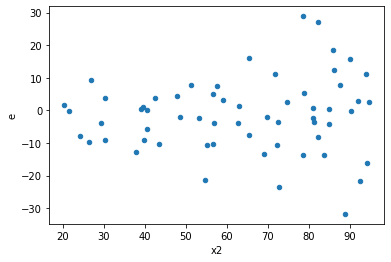

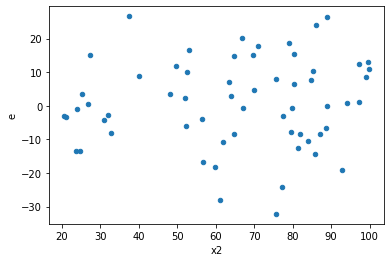

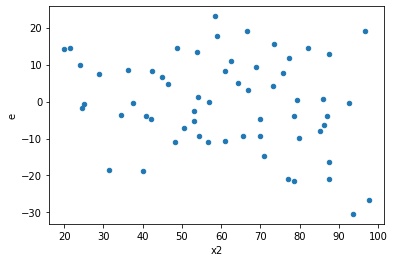

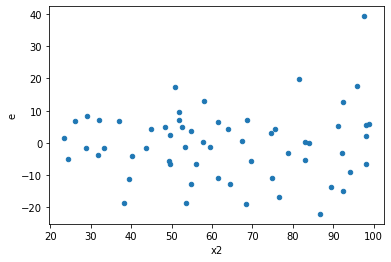

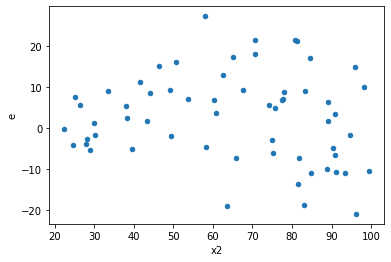

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,1593.4622891353895,4065.4370017086126,75.87915662549474,193.5922381766006,2.5513230086634264,0.03714609758099785,0.9814269512095011,0.018573048790498925,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,1855.3062648726925,4535.77853530584,88.34791737489012,215.98945406218286,2.4447599952545174,0.04635048137842479,0.9768247593107876,0.023175240689212395,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,2259.6911570713387,4149.097243469188,107.6043408129209,197.57605921281845,1.8361346551652677,0.17205975957779085,0.9139701202111046,0.08602987978889542,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,1092.3607122359876,4053.9147024419935,52.01717677314227,193.04355725914255,3.7111502244930685,0.004064349297814074,0.997967825351093,0.002032174648907037,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,962.4714961427803,3633.127987315994,45.83197600679906,173.00609463409495,3.7747902165167377,0.00363679719472243,0.9981816014026388,0.001818398597361215,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,1381.097933320432,3352.0568251778186,65.76656825335391,159.62175357989614,2.4270956782324715,0.048096279972170475,0.9759518600139148,0.024048139986085237,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,1003.3885043185762,3579.575847024469,47.78040496755125,170.45599271545092,3.5674874005612014,0.005243163511913007,0.9973784182440435,0.0026215817559565036,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,2007.4121945362124,3287.005321879261,95.59105688267678,156.52406294663146,1.637434170633143,0.266557693215949,0.8667211533920255,0.1332788466079745,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,1136.474333389186,4555.355247695403,54.11782539948505,216.92167846168584,4.008322153752873,0.002439396995394638,0.9987803015023027,0.001219698497697319,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1593.4622891353895,4065.4370017086126,75.87915662549474,193.5922381766006,2.5513230086634264,0.03714609758099785,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,1855.3062648726925,4535.77853530584,88.34791737489012,215.98945406218286,2.4447599952545174,0.04635048137842479,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,2259.6911570713387,4149.097243469188,107.6043408129209,197.57605921281845,1.8361346551652677,0.17205975957779085,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,1092.3607122359876,4053.9147024419935,52.01717677314227,193.04355725914255,3.7111502244930685,0.004064349297814074,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,962.4714961427803,3633.127987315994,45.83197600679906,173.00609463409495,3.7747902165167377,0.00363679719472243,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,1381.097933320432,3352.0568251778186,65.76656825335391,159.62175357989614,2.4270956782324715,0.048096279972170475,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,1003.3885043185762,3579.575847024469,47.78040496755125,170.45599271545092,3.5674874005612014,0.005243163511913007,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,2007.4121945362124,3287.005321879261,95.59105688267678,156.52406294663146,1.637434170633143,0.266557693215949,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,1136.474333389186,4555.355247695403,54.11782539948505,216.92167846168584,4.008322153752873,0.002439396995394638,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    584
Reject005=1 : Homoscedasticity      416
Name: Result_test, dtype: int64